## AFL 2


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [49]:
df = pd.read_csv('./customer_analysis.csv',  sep='\t', index_col=0)
df.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

In [51]:
# replace Dt_Customer with a datetime column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')


In [52]:
df.describe().transpose()


,count,mean,min,25%,50%,75%,max,std
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373
MntFishProducts,2240.0,37.525446,0.0,3.0,12.0,50.0,259.0,54.628979


In [53]:
df.isna().sum()


Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [54]:
# replace null values of Income column with mean
df['Income'].fillna(df['Income'].mean(), inplace=True)


In [55]:
# drop Z_Revenue and Z_CostContact because they are constant
df.drop(['Z_Revenue', 'Z_CostContact'], axis=1, inplace=True)


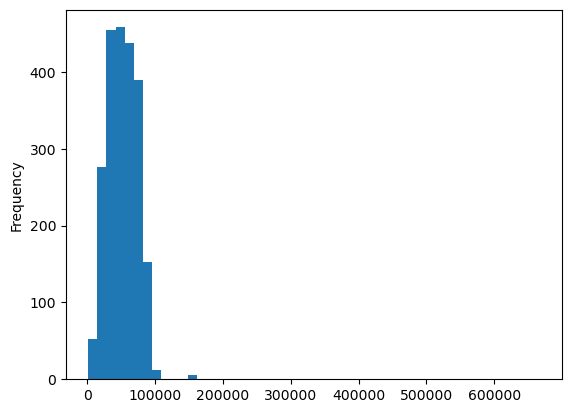

In [56]:
# Visualize the distribution of income because in df.describe() we see that the mean is 52247.251354 and the max is 666666.0
df['Income'].plot(kind='hist', bins=50)
plt.show()


In [57]:
# programmatically drop outliers on Income because it is really skewed
# https://stackoverflow.com/a/63828858
# IQR = Q3 - Q1
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# filter out outliers
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) |(df['Income'] > (Q3 + 1.5 * IQR)))]
df['Income'].describe()


count      2232.000000
mean      51640.236126
std       20601.760369
min        1730.000000
25%       35434.750000
50%       51566.000000
75%       68118.000000
max      113734.000000
Name: Income, dtype: float64

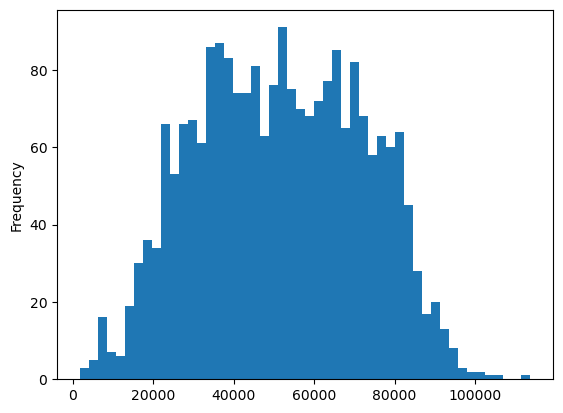

In [58]:
# looks way better now
df['Income'].plot(kind='hist', bins=50)
plt.show()


In [59]:
# Age dechipering, unveil the age of the customer (when they visit) from "Year_Birth" 
current_year = pd.to_datetime('today').year

df['Age'] = current_year - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)


In [60]:
df['Age'].describe()


count    2232.000000
mean       54.207437
std        11.990340
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [61]:
# make "Spent" column, combine "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


In [62]:
df['TotalSpent'].describe()


count    2232.000000
mean      605.596326
std       601.444172
min         5.000000
25%        69.000000
50%       396.500000
75%      1044.250000
max      2525.000000
Name: TotalSpent, dtype: float64

In [63]:
# make "isParent" column, combine "Kidhome" and "Teenhome" if there are kids in the house set the value to 1, otherwise 0
df['isParent'] = (df['Kidhome'] + df['Teenhome']).apply(lambda x: 1 if x > 0 else 0)


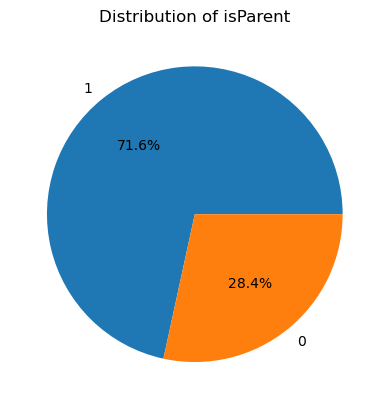

In [64]:
# Calculate the counts of each unique value in the 'isParent' column
counts = df['isParent'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of isParent')

# Show the plot
plt.show()


In [65]:
# make "totalChildren" column, combine "Kidhome" and "Teenhome"
df['totalChildren'] = df['Kidhome'] + df['Teenhome']
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)


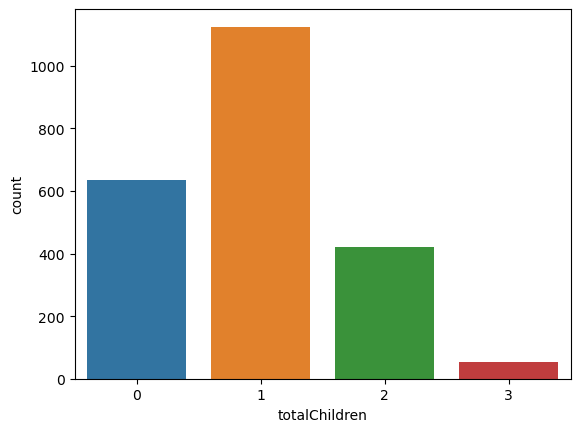

In [66]:
# visualize the distribution of the totalChildren column
sns.countplot(x='totalChildren', data=df)
plt.show()


In [67]:
df['Marital_Status'].value_counts()


Marital_Status
Married     861
Together    576
Single      480
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [68]:
# make "familySize" column, combine "Marital_Status" and "totalChildren" if the customer is married then it is 2, otherwise 1

marital_mapping = {
    "Married": 2,
    "Together": 2,
    "Divorced": 1,
    "Single": 1,
    "Widow": 1,
    "Alone": 1,
    "Absurd": 1,
    "YOLO": 1
}

df['familySize'] = df['Marital_Status'].map(marital_mapping) + df['totalChildren']


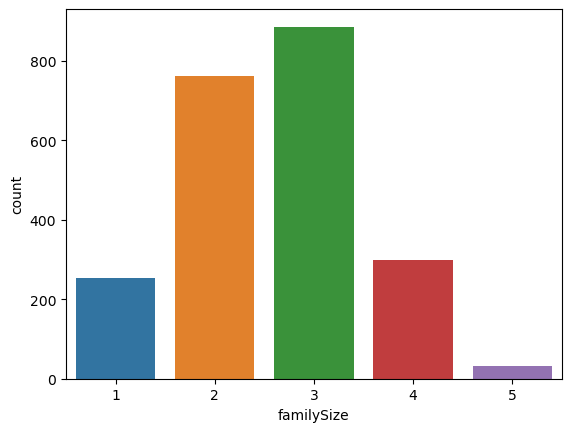

In [69]:
# visualize the distribution of the familySize column
sns.countplot(x='familySize', data=df)
plt.show()


In [70]:
# extract the date, month, and year from the "Dt_Customer" column make 3 new columns with these values
df['EnrollDate'] = df['Dt_Customer'].dt.day
df['EnrollMonth'] = df['Dt_Customer'].dt.month
df['EnrollYear'] = df['Dt_Customer'].dt.year
df.drop('Dt_Customer', axis=1, inplace=True)


In [71]:
# encode "Education" columns into 3 distinct values (from "Graduation", "PhD", "Master", "2n Cycle", "Basic") into only 3 values (0, 1, 2)
# Define a mapping from old categories to new
education_mapping = {
    "Basic": 0,
    "2n Cycle": 1,
    "Graduation": 1,
    "Master": 2,
    "PhD": 2
}

# Apply the mapping to the 'Education' column
df['Education'] = df['Education'].map(education_mapping)


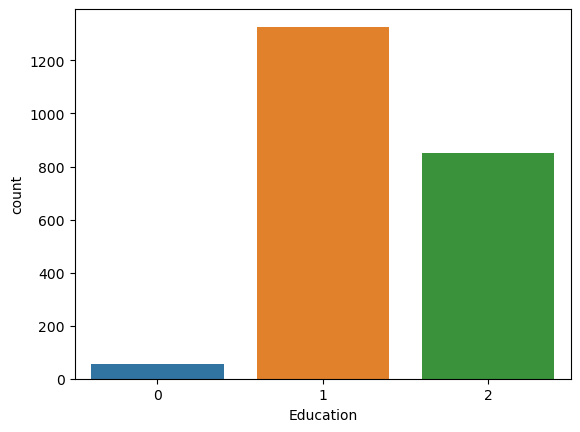

In [72]:
# plot the distribution of the "Education" column
sns.countplot(x='Education', data=df)
plt.show()


In [73]:
# encode "Marital_Status" columns into 3 distinct values (from "Married", "Together", "Divorced", "Single", "Widow", "Alone", "Absurd", "Yolo") into only 3 values (0, 1, 2)
# Define a mapping from old categories to new
marital_mapping = {
    "Married": 0,
    "Together": 0,
    "Divorced": 1,
    "Single": 1,
    "Widow": 1,
    "Alone": 2,
    "Absurd": 2,
    "YOLO": 2
}

# Apply the mapping to the 'Marital_Status' column
df['Marital_Status'] = df['Marital_Status'].map(marital_mapping)


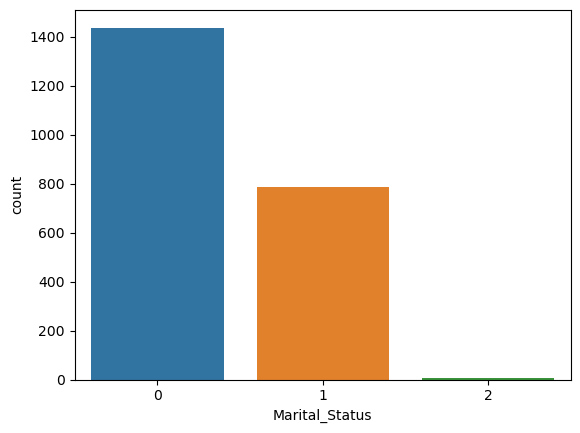

In [74]:
# plot the distribution of the "Marital_Status" column
sns.countplot(x='Marital_Status', data=df)
plt.show()


In [75]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()
scaler.fit(df)

scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
scaled_df.head()


,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,TotalSpent,isParent,totalChildren,familySize,EnrollDate,EnrollMonth,EnrollYear
ID,,,,,,,,,,,,,,,,,,,,,
5524,-0.677287,1.317478,0.315469,0.307081,0.980281,1.547741,1.735476,2.457243,1.472657,0.839843,...,-0.097458,2.383828,0.983726,1.682002,-1.587610,-1.266161,-1.759248,-1.329084,0.724679,-1.501146
2174,-0.677287,1.317478,-0.257134,-0.383851,-0.872949,-0.637496,-0.726318,-0.651911,-0.633057,-0.731254,...,-0.097458,-0.419493,1.233983,-0.962227,0.629878,1.394923,0.446111,-0.873100,-0.994829,1.420003
4141,-0.677287,-0.738893,0.969686,-0.798410,0.359568,0.568152,-0.174694,1.341605,-0.148984,-0.041504,...,-0.097458,-0.419493,0.316372,0.283388,-1.587610,-1.266161,-0.656569,0.608846,0.438095,-0.040572
6182,-0.677287,-0.738893,-1.213481,-0.798410,-0.872949,-0.562143,-0.662493,-0.505598,-0.584649,-0.750414,...,-0.097458,-0.419493,-1.268592,-0.918988,0.629878,0.064381,0.446111,-0.645108,-1.281414,1.420003
5324,1.219456,-0.738893,0.322994,1.550759,-0.391822,0.417446,-0.215724,0.152811,-0.003763,-0.558817,...,-0.097458,-0.419493,-1.018334,-0.305328,0.629878,0.064381,0.446111,0.380855,-1.567998,1.420003


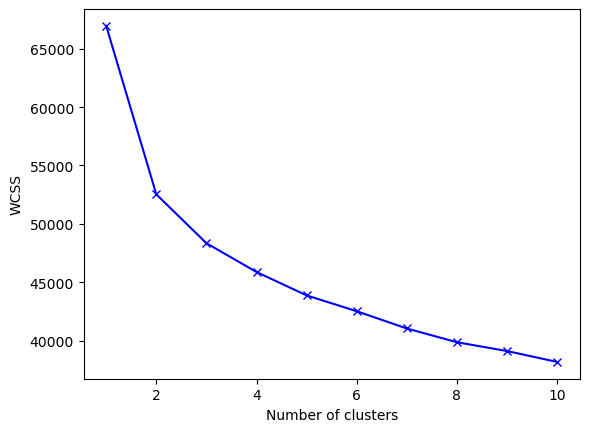

In [76]:
from sklearn.cluster import KMeans

WCSS = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42, n_init=10, max_iter=300)
    kmeans.fit(scaled_df)
    WCSS.append(kmeans.inertia_)
    
# Plot WCSS against number of clusters
plt.plot(range(1, 11), WCSS, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [77]:
from kneed import KneeLocator

# Define the x and y values
x = range(1, 11)
y = WCSS

# Create the KneeLocator object
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print("The recommended number of clusters is:", kn.elbow)


The recommended number of clusters is: 3


In [78]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=kn.elbow, metric='euclidean', linkage='ward')
labels = model.fit_predict(scaled_df)
df['Cluster'] = labels
df.head()


,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,TotalSpent,isParent,totalChildren,familySize,EnrollDate,EnrollMonth,EnrollYear,Cluster
ID,,,,,,,,,,,,,,,,,,,,,
5524,1,1,58138.0,58,635,88,546,172,88,88,...,1,66,1617,0,0,1,4,9,2012,0
2174,1,1,46344.0,38,11,1,6,2,1,6,...,0,69,27,1,2,3,8,3,2014,1
4141,1,0,71613.0,26,426,49,127,111,21,42,...,0,58,776,0,0,2,21,8,2013,0
6182,1,0,26646.0,26,11,4,20,10,3,5,...,0,39,53,1,1,3,10,2,2014,1
5324,2,0,58293.0,94,173,43,118,46,27,15,...,0,42,422,1,1,3,19,1,2014,2


In [79]:
df.groupby('Cluster').agg(count=('Cluster', 'count'), 
                          Income=('Income', 'mean'),
                          MntWines=('MntWines', 'mean'),
                          MntFruits=('MntFruits', 'mean'),
                          MntMeatProducts=('MntMeatProducts', 'mean'),
                          MntFishProducts=('MntFishProducts', 'mean'),
                          NumDealsPurchases=('NumDealsPurchases', 'mean'),
                          NumWebPurchases=('NumWebPurchases', 'mean'),
                          NumCatalogPurchases=('NumCatalogPurchases', 'mean'),
                          NumStorePurchases=('NumStorePurchases', 'mean'),
                          NumWebVisitsMonth=('NumWebVisitsMonth', 'mean'),
                          Age=('Age', 'mean'),
                          TotalSpent=('TotalSpent', 'mean'), 
                          isParent=('isParent', 'mean'),
                          TotalChildren=('totalChildren', 'mean'),
                          FamilySize=('familySize', 'mean'),
                          EnrollYear=('EnrollYear', 'mean'),
                          )


,count,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,TotalSpent,isParent,TotalChildren,FamilySize,EnrollYear
Cluster,,,,,,,,,,,,,,,,,
0,512,75678.391127,647.808594,62.103516,456.724609,90.603516,1.224609,4.996094,5.726562,8.285156,2.919922,54.740234,1396.193359,0.113281,0.142578,1.750000,2013.013672
1,1102,36363.639989,78.541742,6.832123,36.375681,10.551724,2.090744,2.567151,0.867514,3.559891,6.425590,52.079855,159.803993,0.852995,1.186933,2.818512,2013.108893
2,618,58965.921534,424.551780,31.642395,153.825243,42.080906,3.629450,6.082524,3.229773,7.765372,5.378641,57.559871,745.527508,0.970874,1.202265,2.898058,2012.894822


/home/user/anaconda3/envs/kelas_dm/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


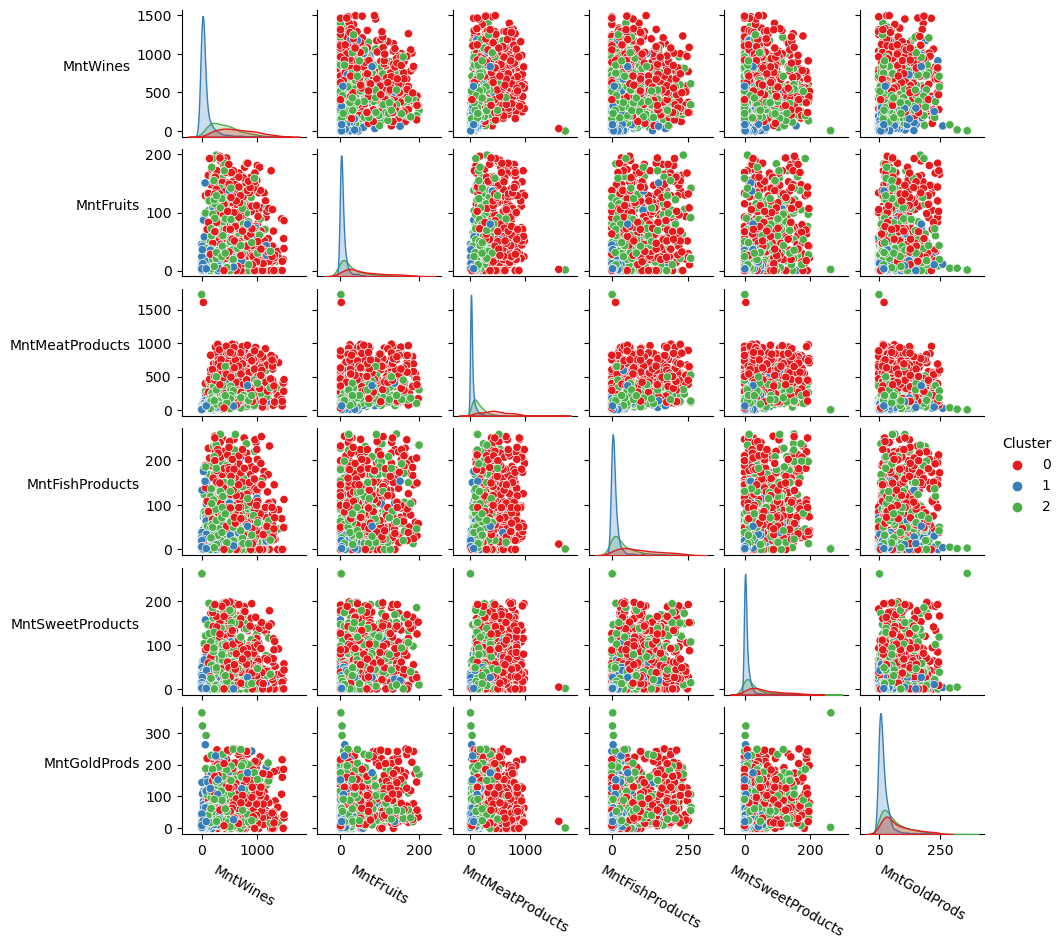

In [80]:
g = sns.pairplot(df[['Cluster', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']], hue='Cluster', palette='Set1', height=1.5)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()


/home/user/anaconda3/envs/kelas_dm/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


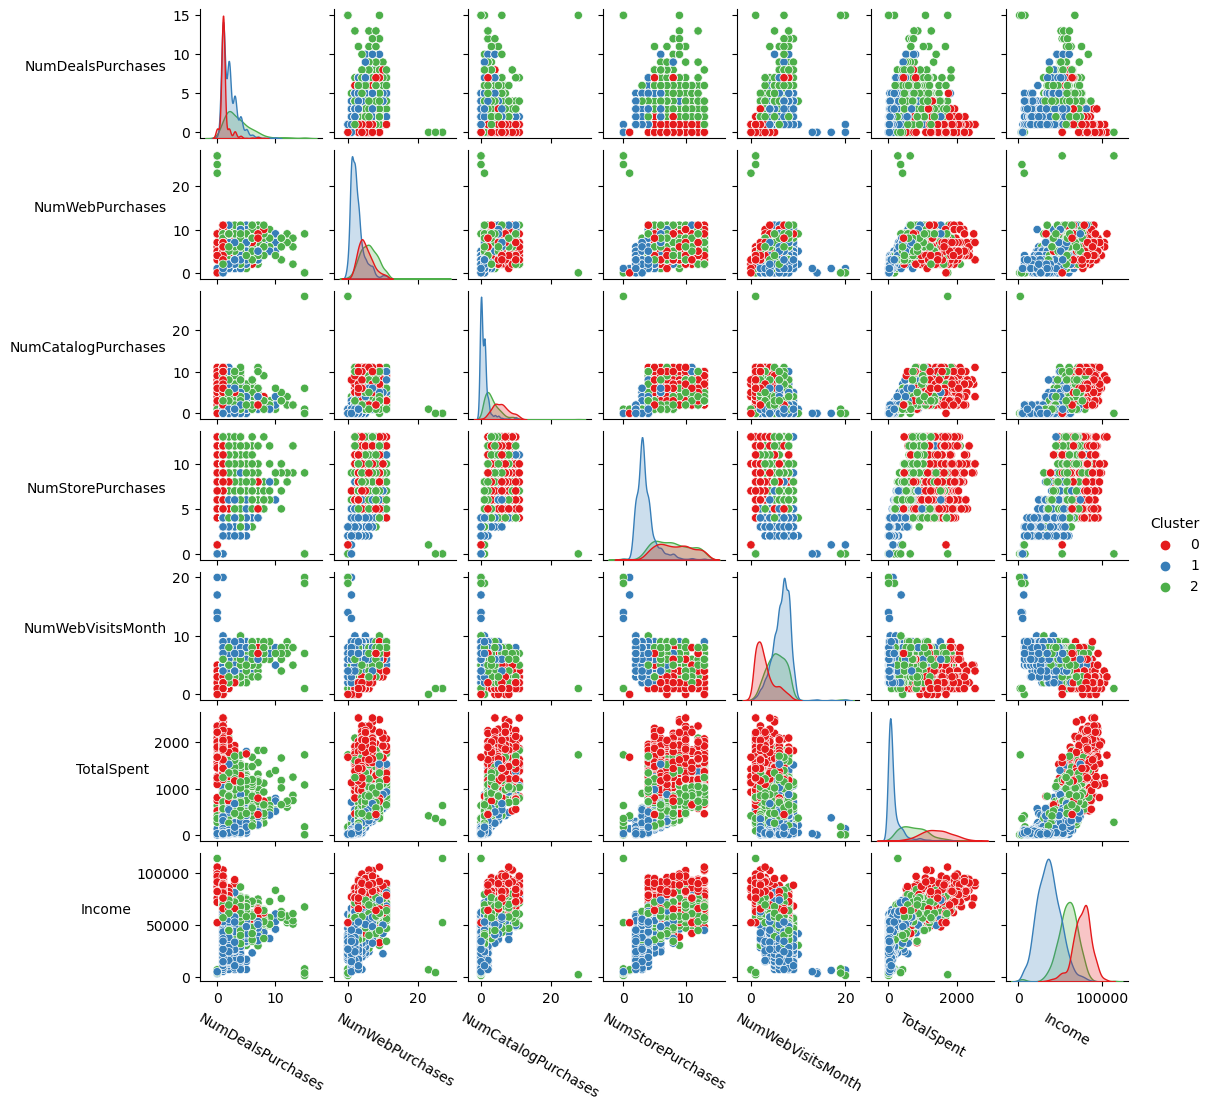

In [81]:
g = sns.pairplot(df[['Cluster', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'TotalSpent', 'Income']], hue='Cluster', palette='Set1', height=1.5)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()


/home/user/anaconda3/envs/kelas_dm/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


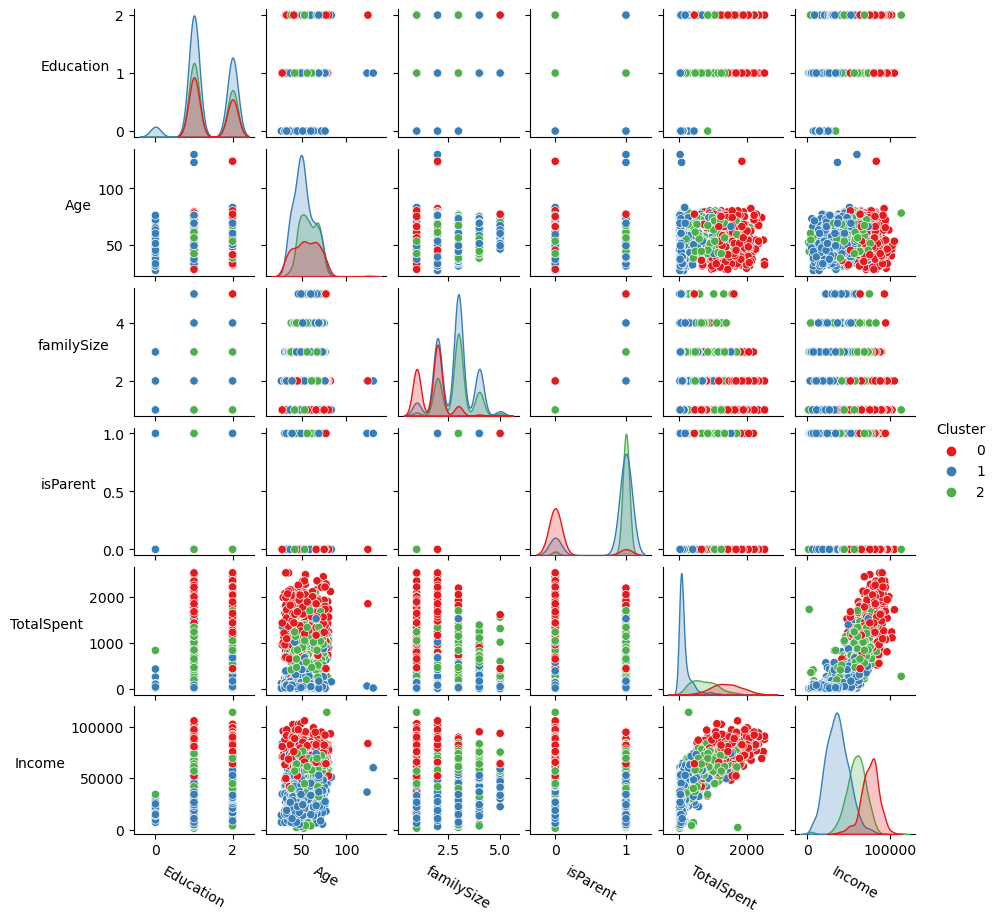

In [82]:
g = sns.pairplot(df[['Cluster', 'Education', 'Age', 'familySize', 'isParent', 'TotalSpent', 'Income']], hue='Cluster', palette='Set1', height=1.5)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()


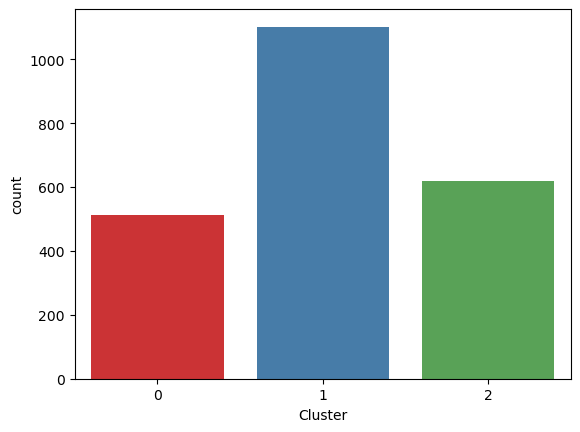

In [83]:
# show distribution of clusters
sns.countplot(x='Cluster', data=df, palette='Set1')
plt.show()


In [84]:
# describe the total spent and income of cluster 0-2
df.groupby('Cluster')[['TotalSpent', 'Income']].describe().transpose()


Cluster                       0             1              2
TotalSpent count     512.000000   1102.000000     618.000000
           mean     1396.193359    159.803993     745.527508
           std       443.009398    235.854328     391.094711
           min        46.000000      5.000000       8.000000
           25%      1096.000000     41.000000     437.250000
           50%      1378.500000     69.000000     703.000000
           75%      1690.000000    165.000000    1011.250000
           max      2525.000000   1804.000000    2092.000000
Income     count     512.000000   1102.000000     618.000000
           mean    75678.391127  36363.639989   58965.921534
           std     10945.908905  13702.286210   12262.294486
           min     33051.000000   3502.000000    1730.000000
           25%     69509.000000  26672.250000   52179.562838
           50%     76713.000000  35790.500000   59781.500000
           75%     82469.250000  45044.250000   67006.000000
           max    105471.000000  88194.000000  113734.000000

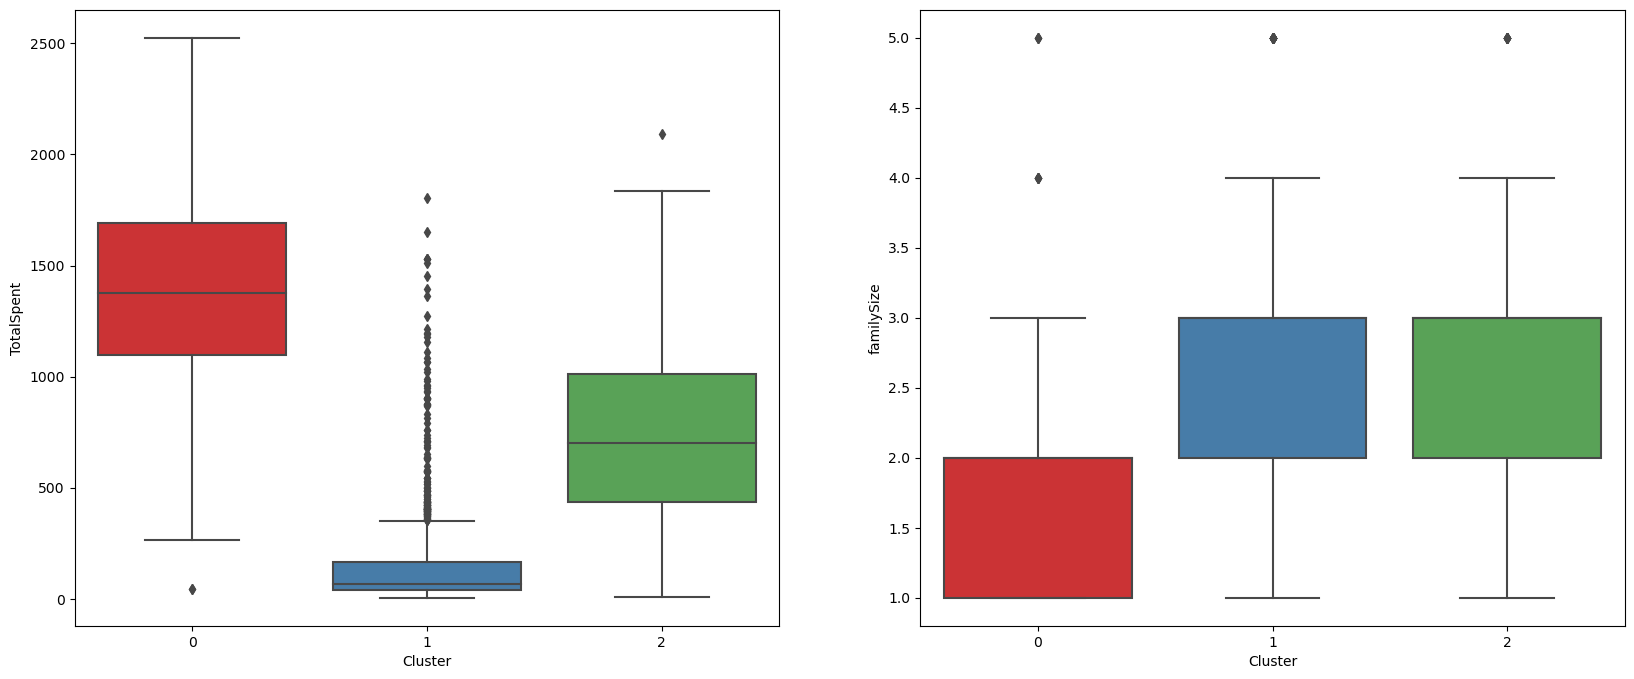

In [85]:
# plot the family size of cluster 0-2 side by side with total spent
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(x='Cluster', y='TotalSpent', data=df, ax=ax[0], palette='Set1')
sns.boxplot(x='Cluster', y='familySize', data=df, ax=ax[1], palette='Set1')
plt.show()


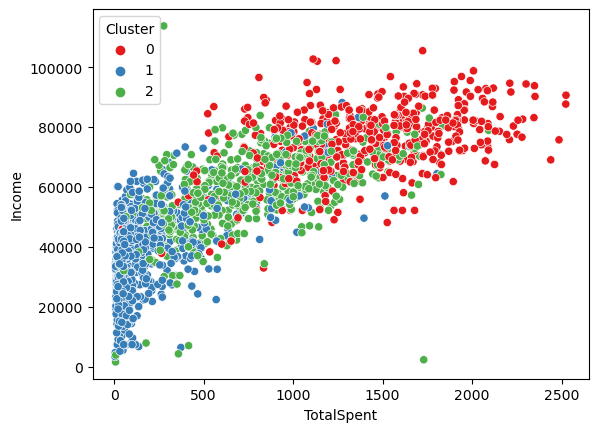

In [86]:
sns.scatterplot(x='TotalSpent', y='Income', hue='Cluster', data=df, palette='Set1')
plt.show()


# Conclusion
There are 3 clusters, where the "1" cluster has the highest number of customers with also the lowest average of total spent and income,
the cluster "0" has the highest average of total spent and income with lowest number of family size, thus it convey a correlation between family size and total spent where the more family size the less total spent and vice versa